In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# First, look at everything.
from subprocess import check_output


In [4]:
#  Pick a Dataset you might be interested in.
#  Say, all airline-safety files...
import zipfile

Dataset = "college-majors"

# Will unzip the files so that you can see them..
with zipfile.ZipFile("../input/data/"+Dataset+".zip","r") as z:
    z.extractall(".")

In [5]:
from subprocess import check_output
print(check_output(["ls", "college-majors"]).decode("utf8"))

all-ages.csv
grad-students.csv
majors-list.csv
recent-grads.csv
women-stem.csv



### Descripcion de cada una de las variables del dataset

---

###### Aclaraciones

- Las variables descriptas cuyo nombre comienza por \*  implica que la definicion del tipo de variable y la descripcion
de la misma pueden darse de igual manera para las variables del dataset que se obtengan reemplazando \* por **Grad** o bien por **Nongrad**
- Se entiende por Grad, personas que poseen un titulo de posgrado *(master o doctorado)*. Segun la definicion de [Graduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/graduate/what-graduate-student)
- Se entiende por Nongrad, personas que poseen unicamente un *titulo de grado*, equivalente a **Undergraduate student**. Segun la definicion de [Undergraduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/undergraduate/what-us-undergraduate-student)

---

-   Major_code:
    - Variable categorica
    - Codigo de la carrera de grado
-   Major:
    - Variable categorica
    - Nombre de la carrera de grado
-   Major_category:
    - Variable categorica
    - Diciplina de la carrera de grado: ej. Ingenieria
-   \*_total
    - Variable cuantitativa
    - Total de graduados
-   \*_sample_size
    - Variable cuantitativa
    - Tamaño de la muestra
-   \*_employed
    - Variable cuantitativa
    - Total de graduados con empleo
-   \*_full_time_year_round
    - Variable cuantitativa
    - Total de graduados con empleo full time durante al menos 35 semanas
-   \*_unemployed
    - Variable cuantitativa
    - Total de graduados sin empleo
-   \*_unemployment_rate
    - Variable cuantitativa
    - Tasa de desempleo de los graduados (\*\_unemployed / (\*\_unemployed + \*\_employed)
-   \*_median
    - Variable cuantitativa
    - Mediana del ingreso anual de los graduados (en dolares)
-   \*_P25
    - Variable cuantitativa
    - Cuantil 25 del ingreso anual de los graduados (en dolares)
-   \*_P75
    - Variable cuantitativa
    - Cuantil 75 del ingreso anual de los graduados (en dolares)
-   Grad_share
    - Variable cuantitativa
    - Porcentaje de graduados de la carrera de grado que poseen un titulo de posgrado (master/doctorado)
-   Grad_premium
    - Variable cuantitativa
    - pocentaje extra de ingresos medios de graduados de esa carrera con titulo de master o doctorado:
        - (Grad_median / Nongrad_median) - 1

## Resumen del dataset

A continuacion se muestran las primeras 5 entradas del set de datos:

In [6]:
# There's only one file above...we'll select it.
students=pd.read_csv(Dataset+"/grad-students.csv")
students.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


A continuacion, se muestran las ultimas 5 entradas del set de datos

In [7]:
students.tail()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
168,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,724,38468,28808,1420,0.035600,50000.0,...,16781,12377,8502,835,0.063200,40000.0,25000,50000.0,0.755354,0.250000
169,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,22716,355,16612,12022,782,0.044958,70000.0,...,6519,4368,3033,357,0.075556,46000.0,30000,70000.0,0.777014,0.521739
170,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,26320,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,1.647059
171,2303,SCHOOL STUDENT COUNSELING,Education,19841,260,11313,8130,613,0.051400,56000.0,...,2232,1328,980,169,0.112892,42000.0,27000,51000.0,0.898881,0.333333
172,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,54159,841,34142,26850,582,0.016761,65000.0,...,4003,3079,2434,0,0.000000,58000.0,45000,79000.0,0.931175,0.120690


## Info de las columnas

A continuacion, se muestra la informacion con info().
Se puede observar el tipo de datos contenido en cada una de las columnas y la cantidad de valores no nulos que posee cada una

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major_code                    173 non-null    int64  
 1   Major                         173 non-null    object 
 2   Major_category                173 non-null    object 
 3   Grad_total                    173 non-null    int64  
 4   Grad_sample_size              173 non-null    int64  
 5   Grad_employed                 173 non-null    int64  
 6   Grad_full_time_year_round     173 non-null    int64  
 7   Grad_unemployed               173 non-null    int64  
 8   Grad_unemployment_rate        173 non-null    float64
 9   Grad_median                   173 non-null    float64
 10  Grad_P25                      173 non-null    int64  
 11  Grad_P75                      173 non-null    float64
 12  Nongrad_total                 173 non-null    int64  
 13  Nongr

Se muestra el shape del set de datos. Que indica:

- (cantidad de filas, cantidad de columnas)

In [10]:
students.shape

(173, 22)

Mirando la salida de info() y shape, se puede inferir que no hay valores nulos en el set de datos

### Cantidad de valores nulos por columna

Para comprobar que no hay valores nulos en ninguna de las columnas, se ejecuta el siguiente codigo:

In [11]:
students.isnull().sum()

Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64

Con esto, queda comprobado que no existen valores nulos en ninguna de las columnas del dataset.

# Variables Cualitativas 

## Se muestran los distintos valores existentes respecto a las columnas cualitativas y la cantidad de filas correspondientes a cada uno.

In [12]:
qualitative_students = students[['Major', 'Major_code', 'Major_category']]
qualitative_students

,Major,Major_code,Major_category
0,CONSTRUCTION SERVICES,5601,Industrial Arts & Consumer Services
1,COMMERCIAL ART AND GRAPHIC DESIGN,6004,Arts
2,HOSPITALITY MANAGEMENT,6211,Business
3,COSMETOLOGY SERVICES AND CULINARY ARTS,2201,Industrial Arts & Consumer Services
4,COMMUNICATION TECHNOLOGIES,2001,Computers & Mathematics
...,...,...,...
168,COUNSELING PSYCHOLOGY,5203,Psychology & Social Work
169,CLINICAL PSYCHOLOGY,5202,Psychology & Social Work
170,HEALTH AND MEDICAL PREPARATORY PROGRAMS,6106,Health
171,SCHOOL STUDENT COUNSELING,2303,Education


### Muestra de todos los valores de "Major" y la cantidad de filas asociadas a cada valor

In [13]:
qualitative_students['Major'].unique()

array(['CONSTRUCTION SERVICES', 'COMMERCIAL ART AND GRAPHIC DESIGN',
       'HOSPITALITY MANAGEMENT', 'COSMETOLOGY SERVICES AND CULINARY ARTS',
       'COMMUNICATION TECHNOLOGIES', 'COURT REPORTING',
       'MARKETING AND MARKETING RESEARCH',
       'AGRICULTURE PRODUCTION AND MANAGEMENT',
       'COMPUTER PROGRAMMING AND DATA PROCESSING',
       'ADVERTISING AND PUBLIC RELATIONS',
       'FILM VIDEO AND PHOTOGRAPHIC ARTS',
       'ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION',
       'MECHANICAL ENGINEERING RELATED TECHNOLOGIES', 'MASS MEDIA',
       'TRANSPORTATION SCIENCES AND TECHNOLOGIES',
       'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
       'MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION',
       'MISCELLANEOUS ENGINEERING TECHNOLOGIES',
       'INDUSTRIAL PRODUCTION TECHNOLOGIES', 'MISCELLANEOUS FINE ARTS',
       'CRIMINAL JUSTICE AND FIRE PROTECTION',
       'BUSINESS MANAGEMENT AND ADMINISTRATION', 'CRIMINOLOGY',
       'MANAGEMENT INFORMATION SYS

In [14]:
counts = qualitative_students['Major'].value_counts()
counts

CONSTRUCTION SERVICES                          1
PSYCHOLOGY                                     1
MATERIALS ENGINEERING AND MATERIALS SCIENCE    1
ANTHROPOLOGY AND ARCHEOLOGY                    1
SOCIAL WORK                                    1
                                              ..
ENGINEERING AND INDUSTRIAL MANAGEMENT          1
COMPUTER SCIENCE                               1
HEALTH AND MEDICAL ADMINISTRATIVE SERVICES     1
AGRICULTURAL ECONOMICS                         1
EDUCATIONAL ADMINISTRATION AND SUPERVISION     1
Name: Major, Length: 173, dtype: int64

In [15]:
counts.unique()

array([1])

### Muestra de todos los valores de "Major_code" y la cantidad de filas asociadas a cada valor

In [16]:
qualitative_students['Major_code'].unique()


array([5601, 6004, 6211, 2201, 2001, 3201, 6206, 1101, 2101, 1904, 6005,
       5701, 2504, 1903, 5901, 2107, 6299, 2599, 2503, 6099, 5301, 6203,
       5503, 6212, 2106, 6204, 6200, 6105, 2100, 1901, 6202, 2502, 1902,
       6104, 2500, 6201, 6000, 6107, 2105, 2403, 4000, 5102, 1100, 1302,
       3401, 5403, 6003, 1303, 6007, 2901, 4101, 6207, 2419, 1105, 6209,
       6210, 3302, 6001, 6205, 2501, 2102, 6103, 1102, 1301, 5504, 2499,
       3604, 4007, 1401, 1106, 3202, 2400, 5098, 2406, 2407, 2416, 2307,
       5507, 5500, 1103, 6109, 1199, 2414, 3402, 1104, 2412, 2411, 5206,
       2417, 4005, 6006, 6199, 6100, 4001, 4002, 5501, 2306, 6110, 2408,
       4901, 5006, 2399, 2402, 5401, 2304, 5205, 3801, 2300, 6002, 2314,
       2601, 2413, 5502, 5404, 3301, 2312, 5004, 6108, 2603, 5200, 1501,
       5000, 5002, 2405, 2401, 6402, 5599, 3701, 3702, 2602, 2311, 3700,
       5506, 5505, 2410, 3699, 5299, 2415, 2309, 5005, 6403, 2409, 4006,
       2313, 2418, 5402, 2305, 2308, 3606, 4801, 23

In [17]:
counts = qualitative_students['Major_code'].value_counts()
counts

5601    1
5200    1
2413    1
5502    1
5404    1
       ..
2501    1
2102    1
6103    1
1102    1
2301    1
Name: Major_code, Length: 173, dtype: int64

In [18]:
counts.unique()

array([1])

### Muestra de todos los valores de "Major_category" y la cantidad de filas asociadas a cada valor

In [19]:
qualitative_students['Major_category'].unique()


array(['Industrial Arts & Consumer Services', 'Arts', 'Business',
       'Computers & Mathematics', 'Law & Public Policy',
       'Agriculture & Natural Resources', 'Communications & Journalism',
       'Engineering', 'Social Science', 'Health', 'Interdisciplinary',
       'Physical Sciences', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Biology & Life Science', 'Education'],
      dtype=object)

In [20]:
qualitative_students['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

/tmp/ipykernel_30260/509151680.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.ax.set_xticklabels(fig.ax.get_xticklabels(),


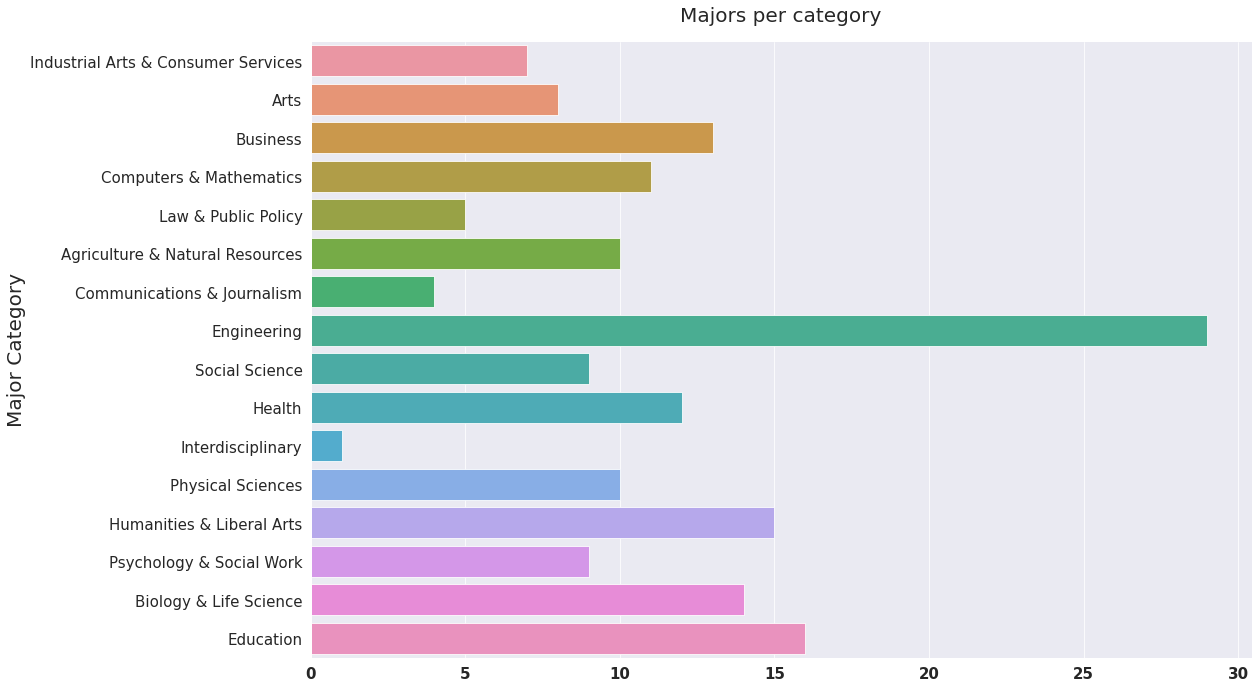

In [21]:
sns.set_context('paper', font_scale=1)

sns.set_style('darkgrid')

fig = sns.catplot(data=qualitative_students, y="Major_category",
                kind="count")

fig.figure.set_size_inches(30, 10)

fig.figure.suptitle("Majors per category", x=0.75, y=1.02, fontsize = 20)

fig.ax.set_ylabel(
    ylabel = "Major Category",
    fontsize = 20,
)

fig.ax.set_yticklabels(fig.ax.get_yticklabels(),
                        fontsize = 15)

fig.ax.set_xlabel(
    xlabel = "",
    fontsize = 20
)

fig.ax.set_xticklabels(fig.ax.get_xticklabels(),
                       fontsize = 15,
                       fontweight = 'bold'
)


plt.show()

### Es posible realizar este grafico con un histograma ?

No tiene sentido el histograma en ninguna de las dos
[link util](https://es.gadget-info.com/difference-between-histogram)

# Variables Cuantitativas

In [22]:
description = students.describe()
description.drop(["count", "std", "min", "max"], inplace=True, axis='index')
description

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
mean,3879.815029,127672.023121,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,112087.34104,214720.312139,154553.520231,120736.820809,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
25%,2403.000000,15284.000000,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,93000.00000,20564.000000,15914.000000,11755.000000,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
50%,3608.000000,37872.000000,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,108000.00000,68993.000000,50092.000000,38384.000000,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,5503.000000,148255.000000,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,130000.00000,184971.000000,129179.000000,103629.000000,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000


In [23]:
#agrego iqr
description = description.transpose()
description["iqr"] = description["75%"] - description["25%"]

description.rename(columns={'50%': 'median'}, inplace=True)

description

,mean,25%,median,75%,iqr
Major_code,3879.815029,2403.000000,3608.000000,5503.000000,3100.000000
Grad_total,127672.023121,15284.000000,37872.000000,148255.000000,132971.000000
Grad_sample_size,2250.872832,314.000000,688.000000,2528.000000,2214.000000
Grad_employed,94037.034682,12659.000000,28930.000000,109944.000000,97285.000000
Grad_full_time_year_round,72861.184971,9894.000000,22523.000000,80794.000000,70900.000000
Grad_unemployed,3506.427746,453.000000,1179.000000,3329.000000,2876.000000
Grad_unemployment_rate,0.039343,0.026068,0.036654,0.048051,0.021983
Grad_median,76755.780347,65000.000000,75000.000000,90000.000000,25000.000000
Grad_P25,52596.508671,45000.000000,50000.000000,60000.000000,15000.000000
Grad_P75,112087.341040,93000.000000,108000.000000,130000.000000,37000.000000


In [24]:
modes = students.mode(axis='index', numeric_only=True).transpose()

description["mode"] = modes[0]

description = description.transpose().drop("Major_code", axis='columns')

description

,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
mean,127672.023121,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,112087.34104,214720.312139,154553.520231,120736.820809,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
25%,15284.000000,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,93000.00000,20564.000000,15914.000000,11755.000000,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
median,37872.000000,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,108000.00000,68993.000000,50092.000000,38384.000000,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,148255.000000,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,130000.00000,184971.000000,129179.000000,103629.000000,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000
iqr,132971.000000,2214.000000,97285.000000,70900.000000,2876.000000,0.021983,25000.000000,15000.000000,37000.00000,164407.000000,113265.000000,91874.000000,6529.000000,0.022406,16300.000000,10000.000000,25000.000000,0.231550,0.169231
mode,1542.000000,98.000000,1008.000000,770.000000,112.000000,0.000000,65000.000000,50000.000000,100000.00000,2232.000000,1328.000000,980.000000,0.000000,0.000000,50000.000000,35000.000000,75000.000000,0.096320,0.333333


# 2. Correlación de atributos

## Exploración de las variables cuantitativas, tomándolas de a pares utilizando un gráfico scatter_matrix

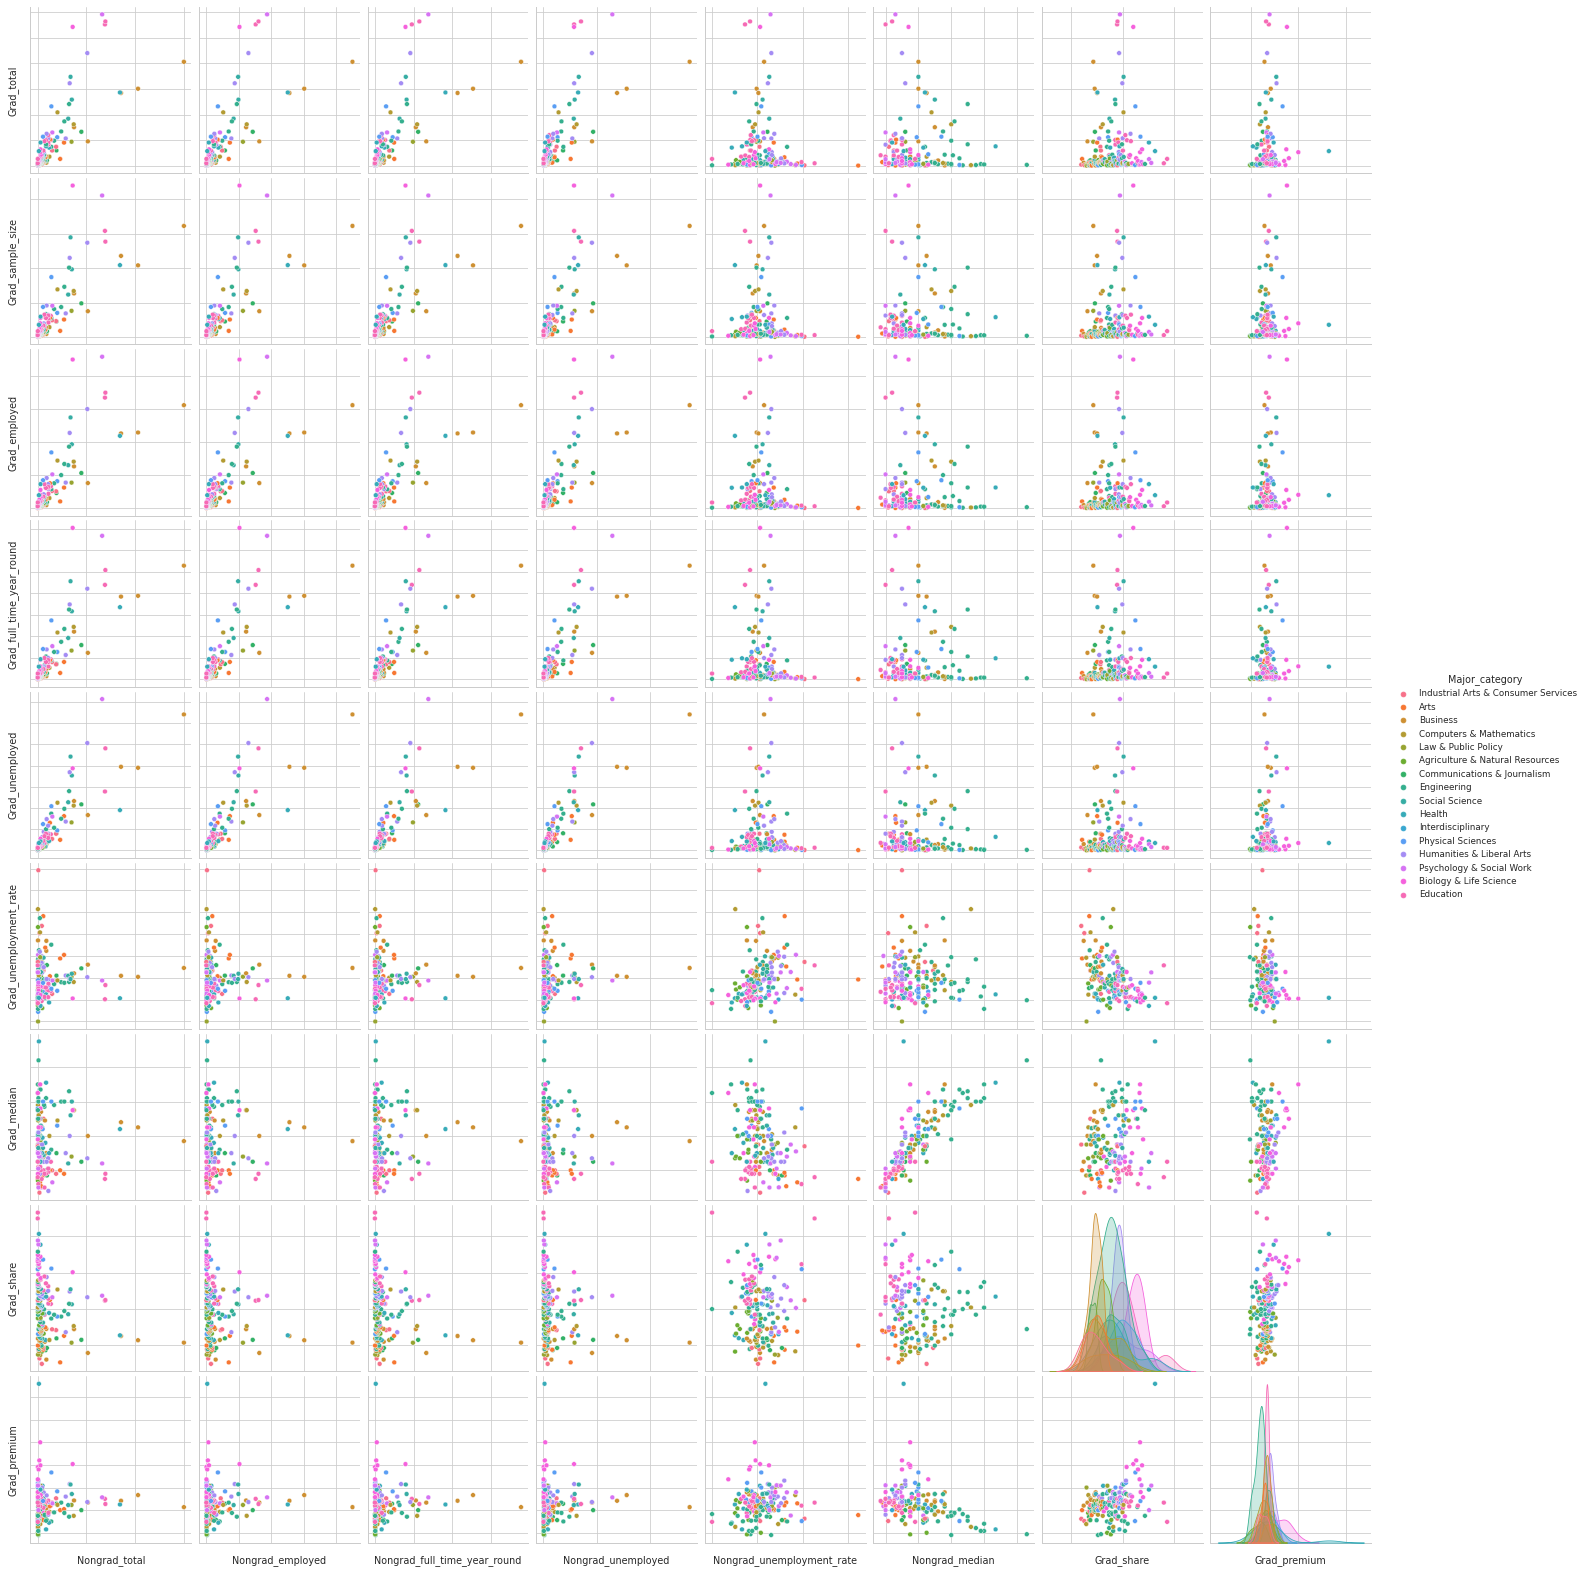

In [25]:
#Gráficos de a pares de variables con Pandas
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1)
from pandas.plotting import scatter_matrix

students_without_col = students.drop(['Major_code', 'Major', 'Grad_P25', 'Grad_P75','Nongrad_P25', 'Nongrad_P75'], axis = 1)
students_without_col.head()

columns = students_without_col.columns.to_list()

columns.remove("Major_category")

vertical_vars = columns[:len(columns) // 2] + columns[-2:]

horizontal_vars = columns[len(columns) // 2:]

grid = sns.pairplot(data=students_without_col,
                    x_vars = horizontal_vars,
                    y_vars = vertical_vars,
                    hue="Major_category",
                    kind="scatter")

grid.set(xticklabels= "", yticklabels = "")


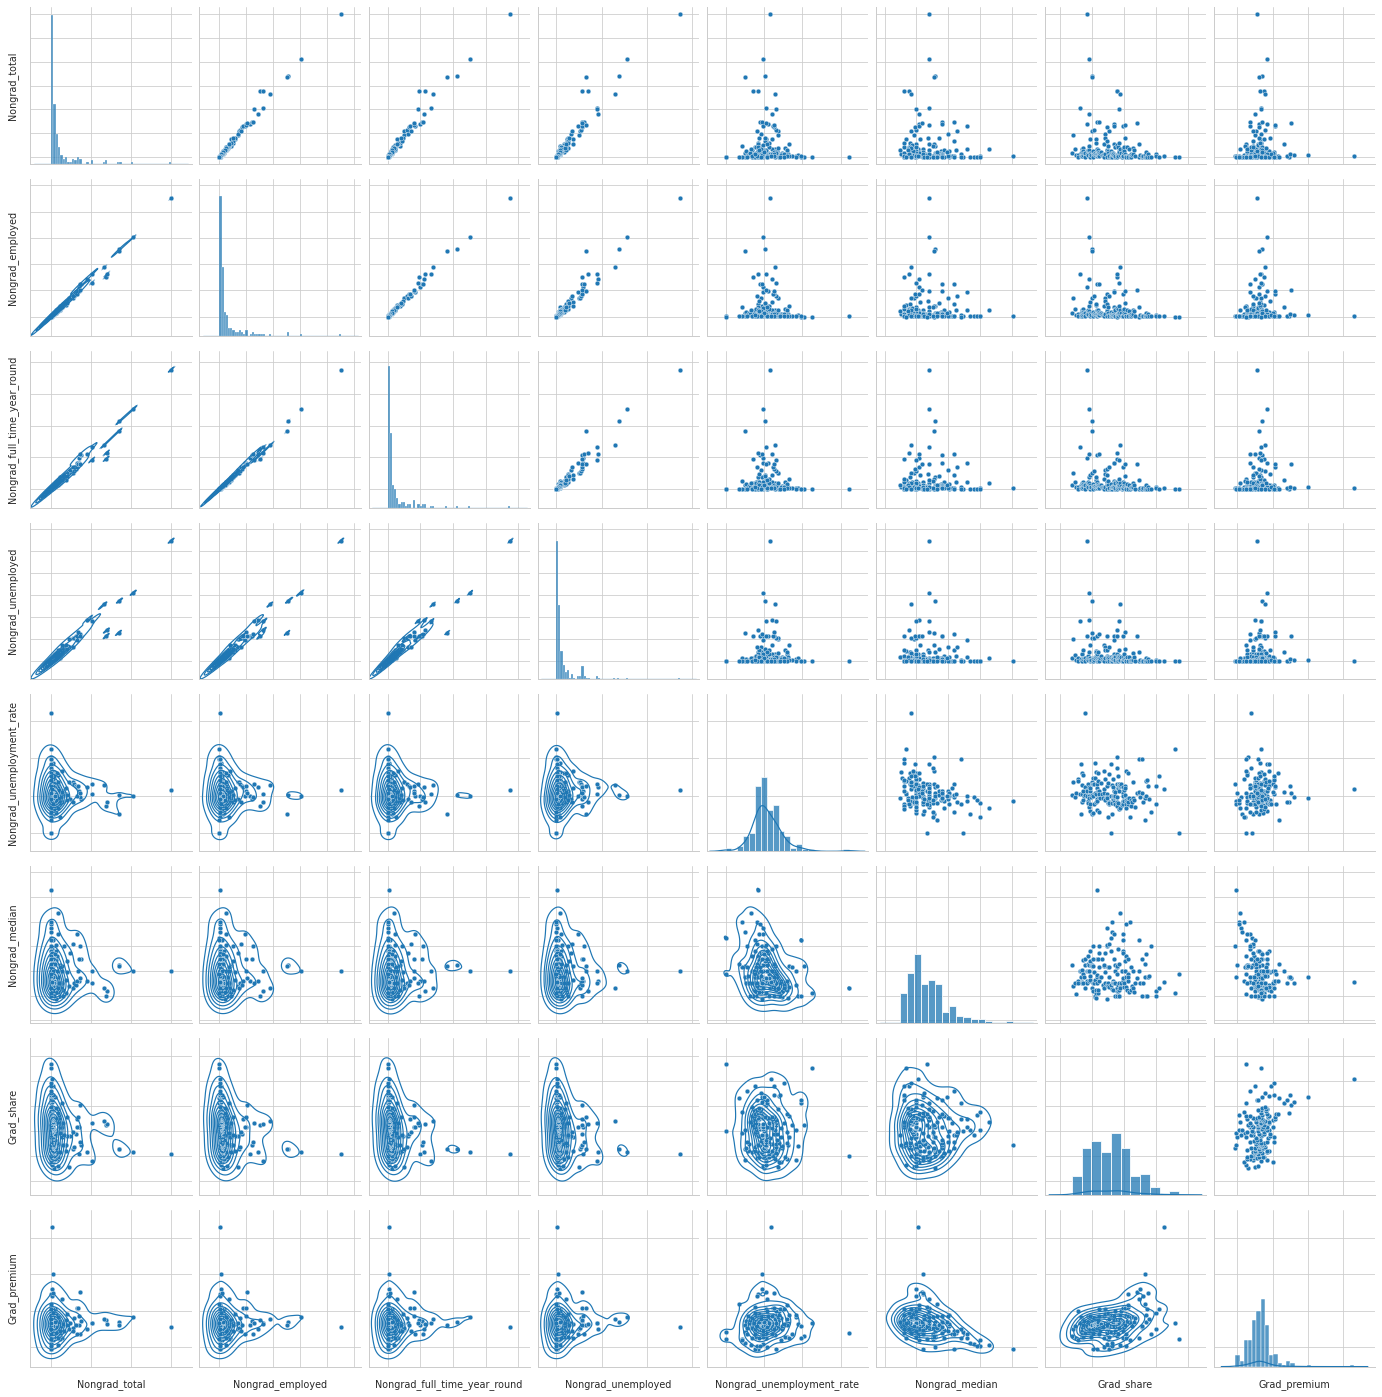

In [26]:
grid = sns.pairplot(data=students_without_col,
                    vars = horizontal_vars,
                    kind="scatter")

grid.set(xticklabels= "", yticklabels = "")

grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot)

## Cálculo de la correlación de Pearson y gráfico de la misma

,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Grad_share,Grad_premium
Grad_total,1.000000,0.982137,0.992306,0.980089,0.936666,-0.111950,0.008317,0.807979,0.764224,0.731108,0.743246,-0.064865,-0.089054,0.081207,0.157328
Grad_sample_size,0.982137,1.000000,0.995567,0.997142,0.948576,-0.108108,0.067963,0.815635,0.787060,0.763896,0.774614,-0.059095,-0.042328,0.070709,0.167384
Grad_employed,0.992306,0.995567,1.000000,0.995330,0.948621,-0.109514,0.038448,0.813859,0.780418,0.752793,0.765287,-0.058947,-0.066691,0.072857,0.164951
Grad_full_time_year_round,0.980089,0.997142,0.995330,1.000000,0.954965,-0.103349,0.077038,0.829320,0.802996,0.782452,0.788851,-0.059904,-0.032006,0.059805,0.162571
Grad_unemployed,0.936666,0.948576,0.948621,0.954965,1.000000,0.004597,0.025488,0.863304,0.843102,0.828060,0.871788,0.011279,-0.051821,-0.006270,0.108813
Grad_unemployment_rate,-0.111950,-0.108108,-0.109514,-0.103349,0.004597,1.000000,-0.138856,-0.004280,0.006807,0.013982,0.058464,0.236663,-0.029934,-0.404447,-0.207234
Grad_median,0.008317,0.067963,0.038448,0.077038,0.025488,-0.138856,1.000000,-0.009722,0.007937,0.036256,-0.016613,-0.293275,0.812758,0.154882,0.208806
Nongrad_total,0.807979,0.815635,0.813859,0.829320,0.863304,-0.004280,-0.009722,1.000000,0.994457,0.984401,0.961395,-0.059792,-0.039558,-0.188484,0.026476
Nongrad_employed,0.764224,0.787060,0.780418,0.802996,0.843102,0.006807,0.007937,0.994457,1.000000,0.996290,0.970264,-0.056969,-0.019788,-0.211898,0.017748
Nongrad_full_time_year_round,0.731108,0.763896,0.752793,0.782452,0.828060,0.013982,0.036256,0.984401,0.996290,1.000000,0.972530,-0.055081,0.007651,-0.219046,0.013254


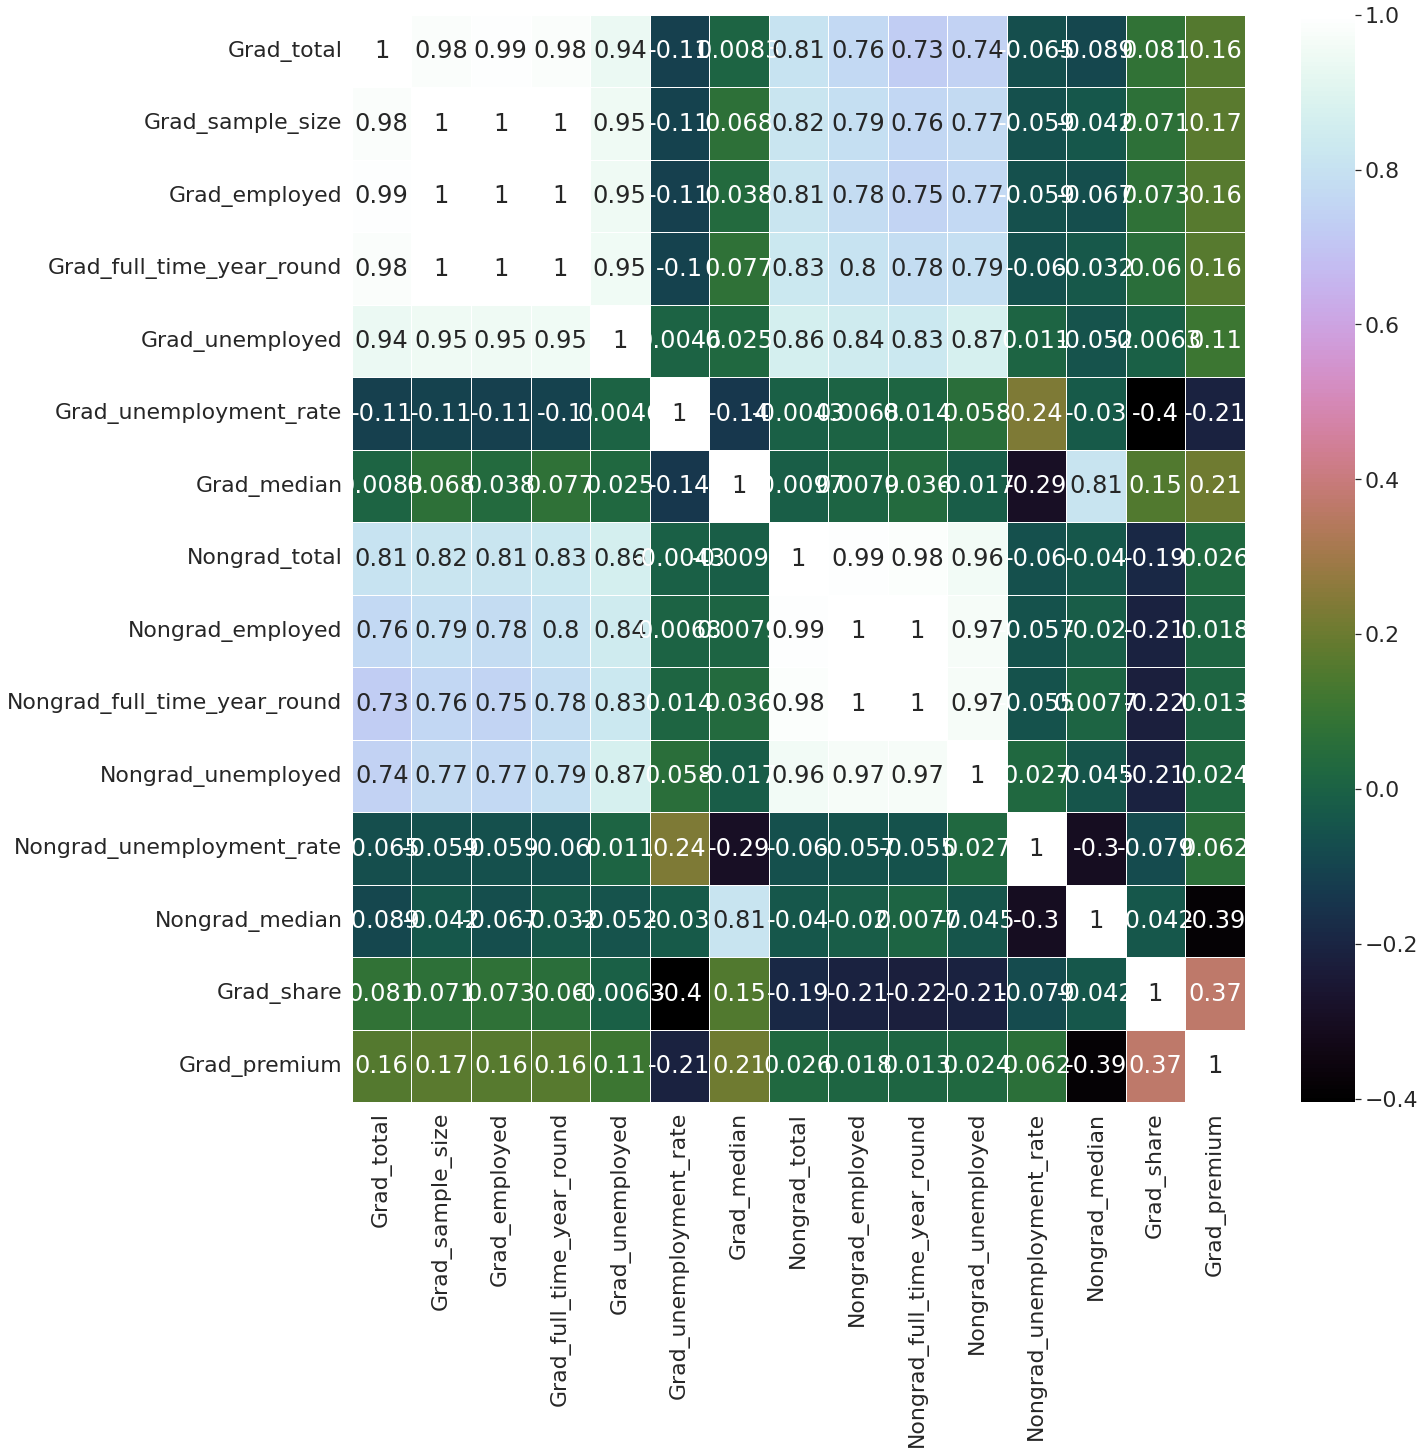

In [27]:
import seaborn as sns

correlaciones = students_without_col.corr()
display(correlaciones)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(20,20))
grf=sns.heatmap(correlaciones,annot=True, linewidths=.5, ax=ax, cmap = sns.color_palette("cubehelix", as_cmap=True))

# 3. Visualizaciones


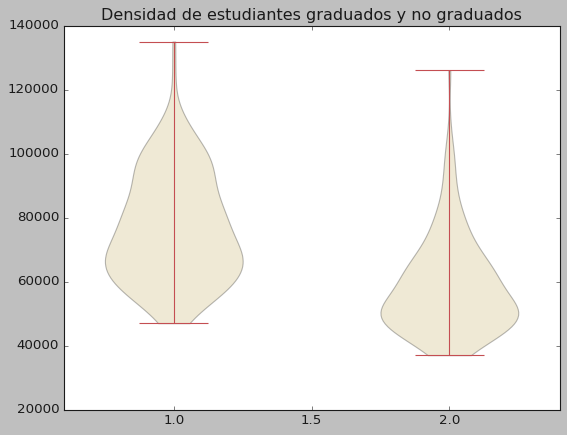

In [28]:
plt.style.use('classic')

fig, ax = plt.subplots()
ax.violinplot([students['Grad_median'], students['Nongrad_median']])
# Add title
ax.set_title('Densidad de estudiantes graduados y no graduados')
plt.show()

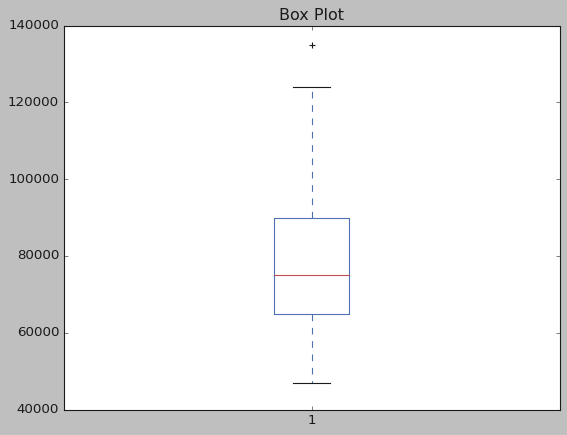

In [29]:
f, ay = plt.subplots()
x = students['Grad_median']
ay.boxplot(x)
# Add title
ay.set_title('Box Plot')
plt.show()

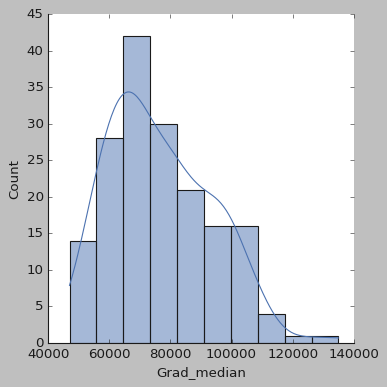

In [30]:
sns.displot(data=students['Grad_median'], kde=True)

<AxesSubplot:xlabel='Grad_median', ylabel='Density'>

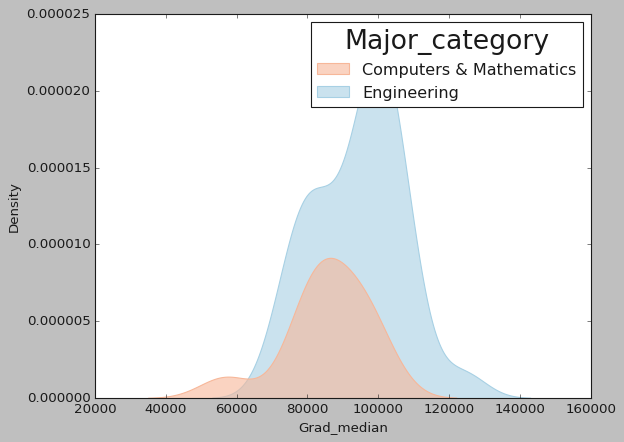

In [31]:
sacado = students.query("Major_category == 'Engineering' or Major_category == 'Computers & Mathematics'")

sns.kdeplot(data=sacado, x="Grad_median", hue="Major_category", alpha=0.6, fill=True, palette= 'RdBu')

In [32]:


Categorias_de_major = students['Major_category']
texto = Categorias_de_major.to_string()


students['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [33]:


fig = plt.figure(figsize = (20, 10), facecolor = 'w', edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Major categorys mas piolas', fontweight = 'bold',  fontsize = 25, pad = 50.0)

plt.show()

NameError: name 'wordcloud' is not defined

<Figure size 1600x800 with 0 Axes>

In [ ]:
def sacar_unnamed(data_set):
    columnas = data_set.columns
    a_sacar = []
    for columna in columnas:
        if columna.startswith("Unnamed:"):

            a_sacar.append(columna)

    return data_set.drop(a_sacar, axis=1)


spotify = pd.read_csv('dataset_spotify.csv')



spotify_copia = sacar_unnamed(spotify)

spotify_copia.head()

In [ ]:
spotify_copia.tail()

In [ ]:
spotify_copia.shape

In [ ]:
spotify_copia.describe()

In [ ]:
spotify_copia.info()

In [ ]:
for columna in spotify_copia.columns:
    if columna not in ["genre", "popularity", "duration_ms"]:
        spotify_copia[columna] = spotify_copia[columna].apply(lambda value: float(value.strip().replace(',', '.').replace('(', '').replace(')', '')))

spotify_copia.info()

In [ ]:
ax = sns.barplot(x="genre", y="popularity", data=spotify_copia)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Preguntas:

1. Que hace que una cancion sea bailable ?
2. A que esta ligada la popularidad de una cancion ?

In [ ]:
columnas = spotify_copia.columns.to_list()
columnas.remove(" danceability ")
columnas.remove("genre")

grid = sns.pairplot(data=spotify_copia, y_vars = [" danceability "], x_vars = columnas, hue="genre")

grid.set(xticklabels="", yticklabels="")

plt.show()

In [ ]:
correlaciones = spotify_copia.corr()
correlaciones

In [ ]:
sns.heatmap(correlaciones)

In [ ]:
duracion = spotify_copia["duration_ms"] / 60000
duracion.describe()

In [ ]:
sns.regplot(x = duracion, y = spotify_copia[' danceability '])

In [ ]:
sns.residplot(x = duracion, y = spotify_copia[' danceability '])

In [ ]:
spotify_copia.corr()
